In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('spam.csv', encoding='latin-1')


In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4913,ham,You've already got a flaky parent. It'snot sup...,NaN,NaN,NaN
4705,ham,Wow so healthy. Old airport rd lor. Cant thk o...,NaN,NaN,NaN
1808,ham,Aiyo a bit pai seh Ì_ noe... Scared he dun rem...,NaN,NaN,NaN
2695,ham,And whenever you and i see we can still hook u...,NaN,NaN,NaN
1052,ham,I got another job! The one at the hospital doi...,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Pre Processing
# 4. Model Buiding
# 5. Model Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
# drop last 3 columns

In [13]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)   #inplace true is used for permanent changes

In [14]:
df.sample(5)

,v1,v2
5188,ham,Okie
999,ham,"Aight will do, thanks again for comin out"
2780,ham,Long after I quit. I get on only like 5 minute...
1531,ham,Oh dang! I didn't mean o send that to you! Lol!
1974,ham,Thats cool. Where should i cum? On you or in y...


In [15]:
# renaming the columns

In [16]:
df.rename(columns = {'v1':'target','v2':'text'}, inplace = True)
df.sample(5)

,target,text
3742,ham,"Nah, Wednesday. When should I bring the mini c..."
3583,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...
4087,ham,He needs to stop going to bed and make with th...
219,ham,Yeah you should. I think you can use your gt a...
2851,ham,how tall are you princess?


In [17]:
from sklearn.preprocessing import LabelEncoder


In [18]:
encoder = LabelEncoder()

In [19]:
df['target'] = encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# missing values

In [22]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
# check for duplicated values

In [24]:
df.duplicated().sum()

403

In [25]:
df = df.drop_duplicates(keep = 'first')

In [26]:
df.shape

(5169, 2)

## 2. EDA

In [27]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [29]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1281e1d50>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

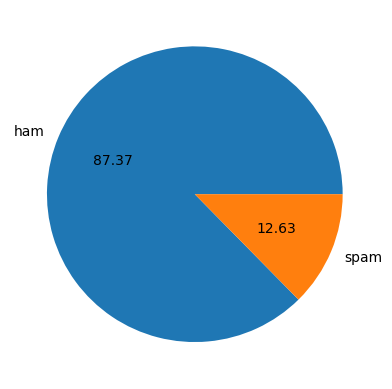

In [30]:
plt.pie(df['target'].value_counts(), labels =['ham','spam'],autopct = "%0.2f")

In [31]:
# Data is imbalanced

In [32]:
import nltk   #natural langues tool kit .. this is for how many words, sentences, charecters are there in column

In [33]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mayurkulkarni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mayurkulkarni/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [34]:
df['text'].apply(len)   # length of sentences including all charecters

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [35]:
df['num_charecters']=df['text'].apply(len)

In [36]:
df.head(5)

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
# no of words

In [38]:
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))    #separate words

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [39]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))    

In [40]:
df.head(5)

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [41]:
#no of sentences

In [42]:
df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))    

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [43]:
df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))   

In [44]:
df.head(5)

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [45]:
df[['num_charecters', 'num_words', 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
# details for 0 target

In [47]:
df[df['target']== 0][['num_charecters', 'num_words', 'num_sentences']].describe()    #for ham msgs

,num_charecters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
df[df['target']== 1][['num_charecters', 'num_words', 'num_sentences']].describe() 

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [49]:
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_charecters', ylabel='Count'>

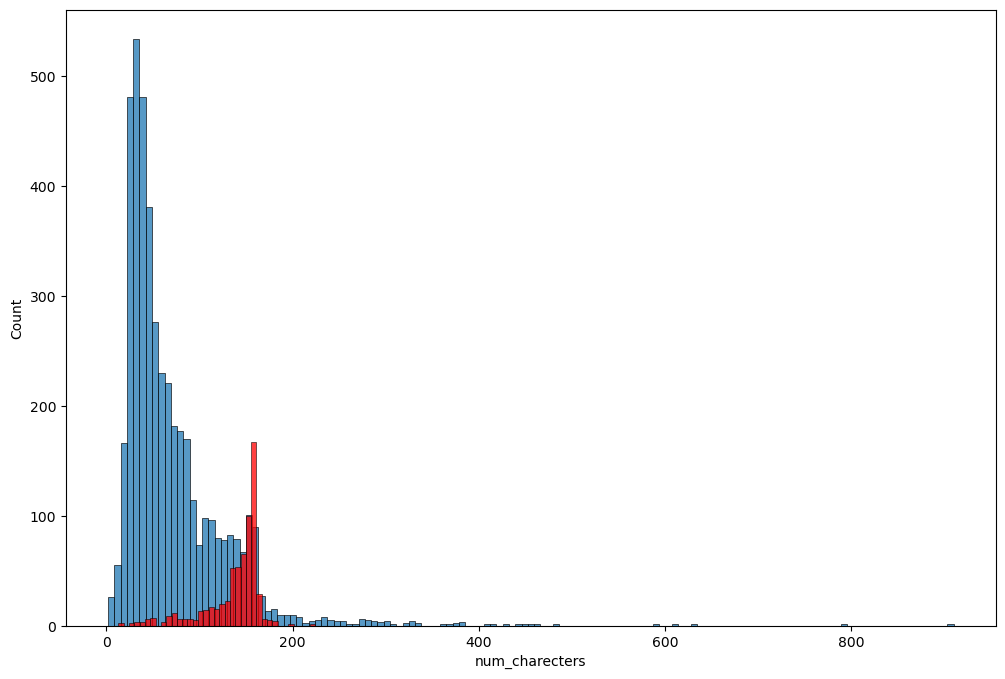

In [50]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target'] == 0]['num_charecters'])
sns.histplot(df[df['target'] == 1]['num_charecters'], color='red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

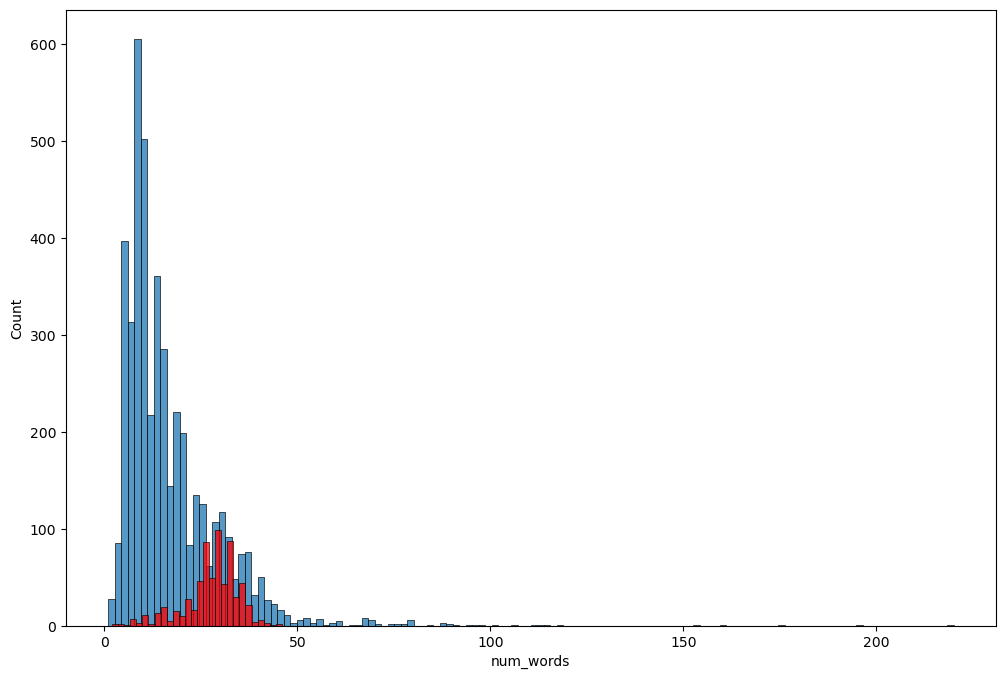

In [51]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option

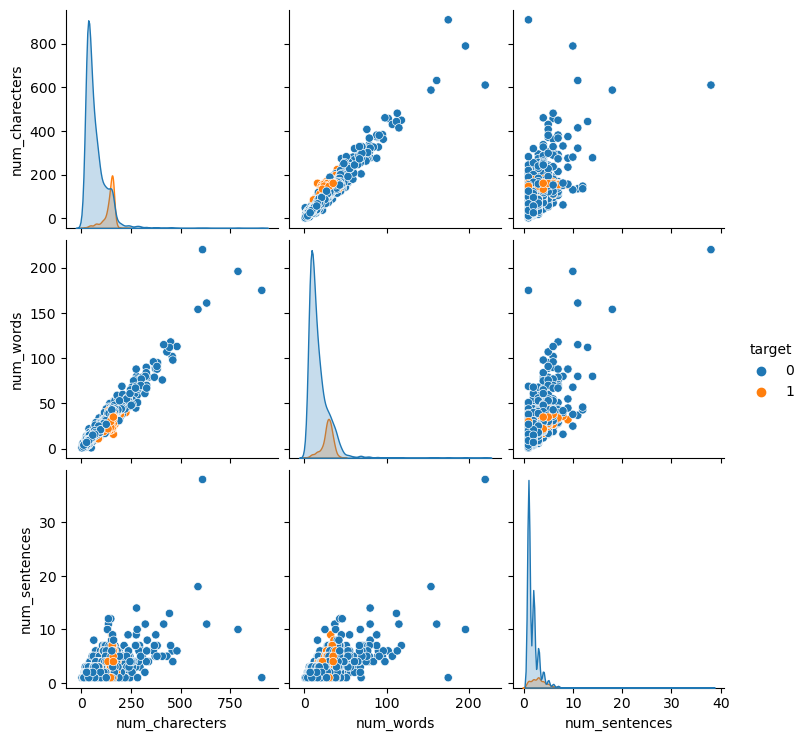

In [52]:
sns.pairplot(df, hue='target')

In [53]:
# there are outliers which can harm the analysis

In [54]:
df.corr(numeric_only=True)


,target,num_charecters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_charecters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

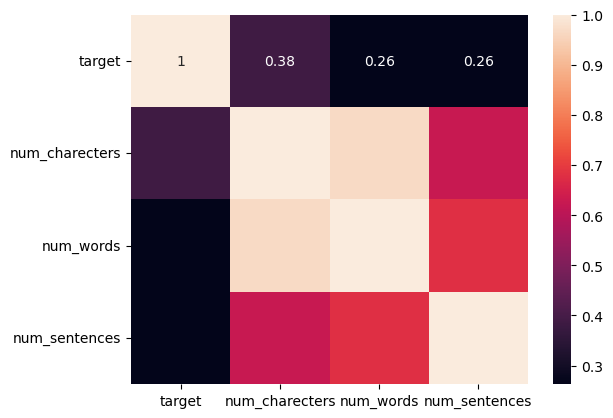

In [55]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [56]:
# jitane jyada words utana smap msgs analysis

## 3. Data Preprocessing
    i. Lower case
    ii. Tokenization
    iii. Removing special characters
    iv. Removing stopwords and punctuations
    v. Stemming

In [57]:
def transform_text(text):
    text = text.lower()           # lower case
    text = nltk.word_tokenize(text)    # \tokenize i.e. separate words in form of list
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text =y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:     # remove special characters, stopwords and punctuation
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [58]:
from nltk.corpus import stopwords
stopwords.words('english')     #total stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [59]:
import string
string.punctuation    #total puctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
transform_text('Hi, How are you Nitish dancing?')

NameError: name 'ps' is not defined

In [61]:
from nltk.stem.porter import PorterStemmer   #how stemming is done
ps = PorterStemmer()
ps.stem('dancing')
ps.stem('loving')   #what stemming does

'love'

In [62]:
#passing into fucntion

In [63]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [64]:
df['transformed_text'] = df['text'].apply(transform_text)

In [65]:
df.head(5)

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
#generate wordcloud

In [67]:
from wordcloud import WordCloud

wc = WordCloud(
    width=500,
    height=500,
    min_font_size=10,
    background_color='white'
)


In [68]:
spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
spam_wc = wc.generate(spam_text)


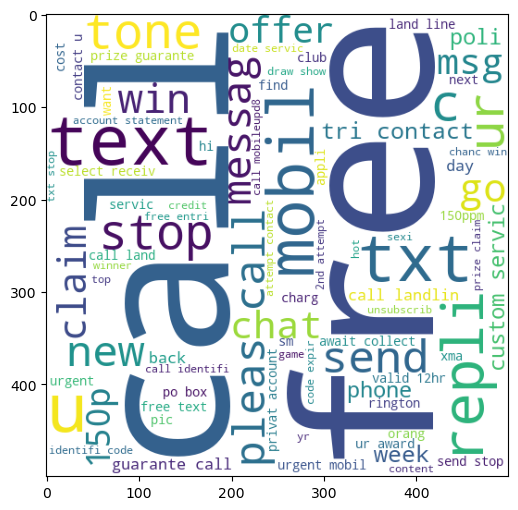

In [69]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

In [70]:
spam_text = df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")
spam_wc = wc.generate(spam_text)

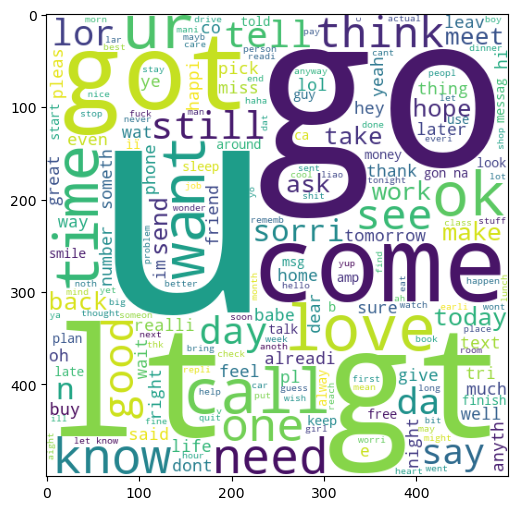

In [71]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

In [72]:
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [73]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [74]:
len(spam_corpus)

9939

In [75]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [76]:
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30))    #most common 30 spam words

In [77]:
spam_df

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


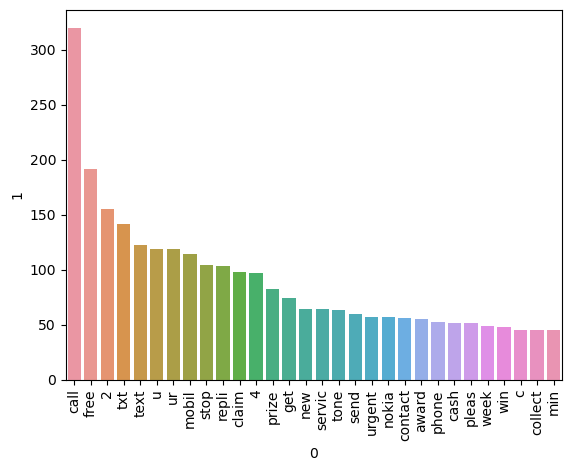

In [78]:
sns.barplot(x=spam_df[0], y=spam_df[1])
plt.xticks(rotation=90)
plt.show()

In [79]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [80]:
len(ham_corpus)

35404

In [81]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [82]:
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30))    #most common 30 ham words

In [83]:
ham_df

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


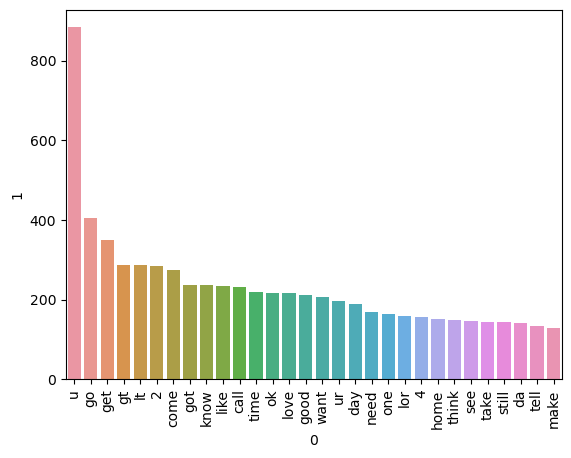

In [84]:
sns.barplot(x=ham_df[0], y=ham_df[1])
plt.xticks(rotation=90)
plt.show()

## 4. Model Building

In [85]:
#we will use bag of words for vector embedding

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
cv = CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer


In [88]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [89]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
X.shape

(5169, 6708)

In [91]:
y = df['target'].values

In [92]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [95]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [96]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [97]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [98]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [99]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))     #precision score in bernouli is good

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [102]:
#Now try with TFIDF

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)


In [129]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [130]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
X1.shape

(5169, 3000)

In [132]:
y = df['target'].values

In [133]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [134]:
X1_train, X1_test,y_train,y_test = train_test_split(X1,y,test_size = 0.2, random_state = 2)

In [135]:
gnb.fit(X1_train,y_train)
y_pred1 = gnb.predict(X1_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [136]:
mnb.fit(X1_train,y_train)
y_pred2 = mnb.predict(X1_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))    #here precision score is 1 no false positive

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [137]:
bnb.fit(X1_train,y_train)
y_pred3 = bnb.predict(X1_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)) 

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [138]:
# tfidf -- > mnb have been chosen

In [139]:
# you can check all classifier algoythm to check precision score as 1 and then check accuracy score near to 1
#in that NB with tdifd gives best 

## 5. Improvement in Model

In [140]:
#change the max_features parameter of tfidf

In [141]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))